In [1]:
##Equipo de trabajo: Bravo, Juan - Groppa, Danilo - Marín, Jaqueline

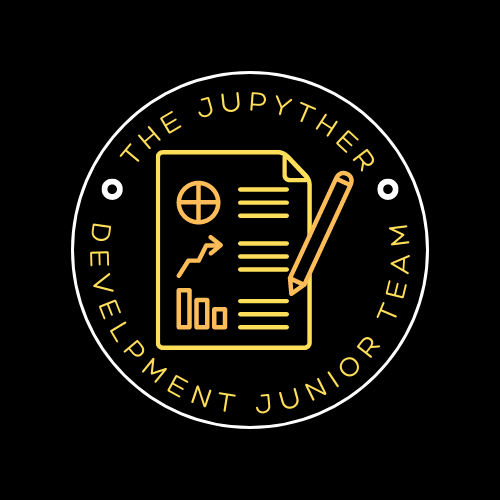

In [2]:
##Logo de la página de donde se obtuvo el dataset
from PIL import Image
im = Image.open('jdjlogo.png')
im

In [153]:
#Importamos las librerias
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from sklearn import preprocessing
from sklearn import utils

In [176]:
countriessocioeconomic = pd.read_csv('countriessocio-economic.csv', sep=',', encoding='latin-1')
countriessocioeconomic.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [155]:
countriessocioeconomic2 = pd.read_csv('data-dictionary.csv')
countriessocioeconomic2

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


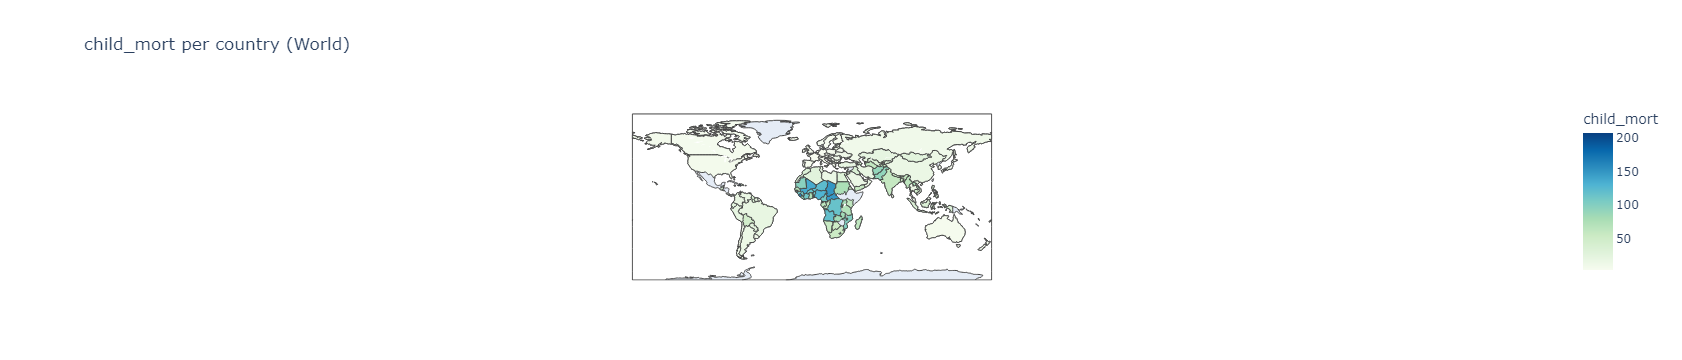

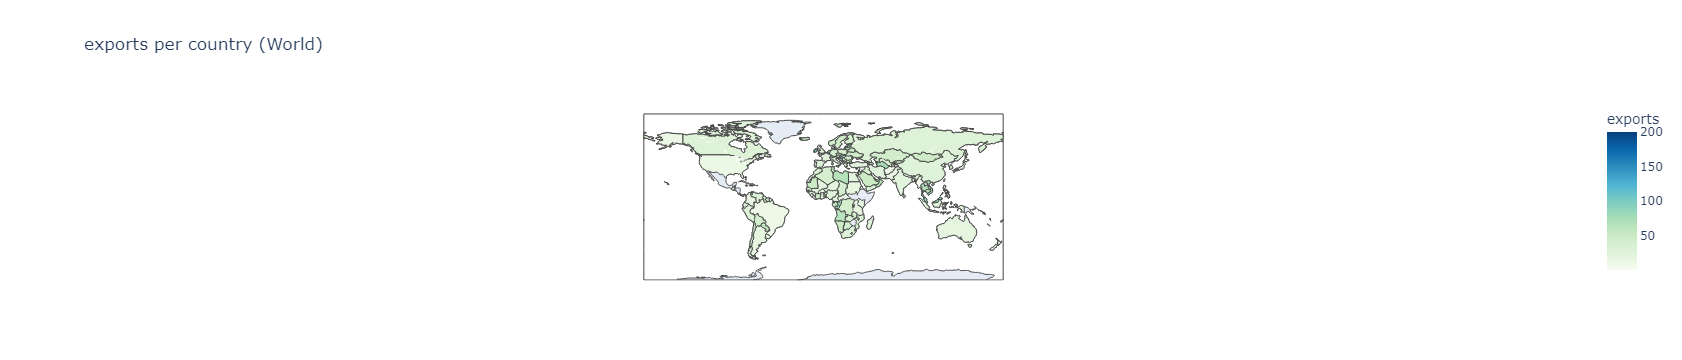

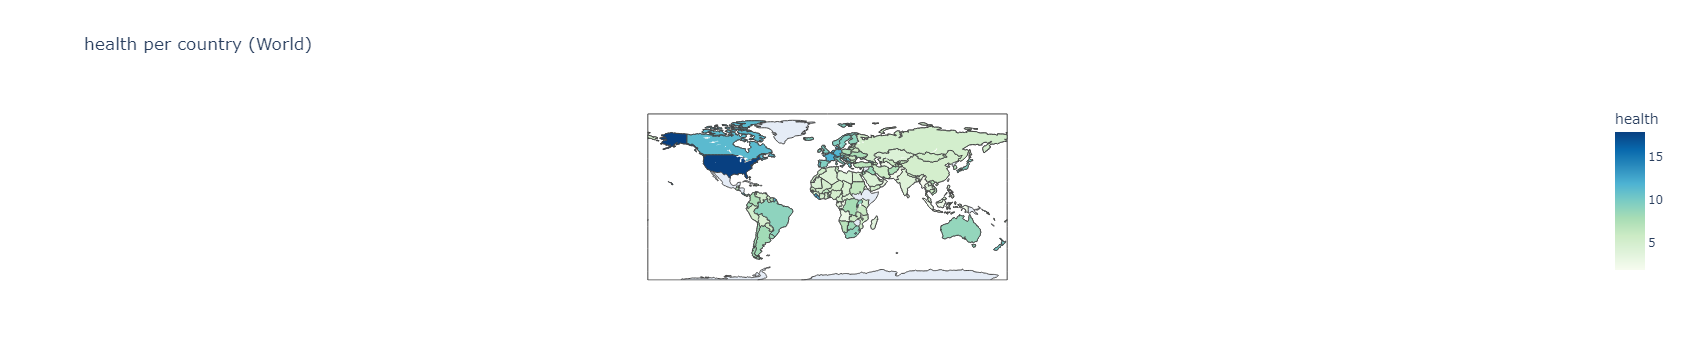

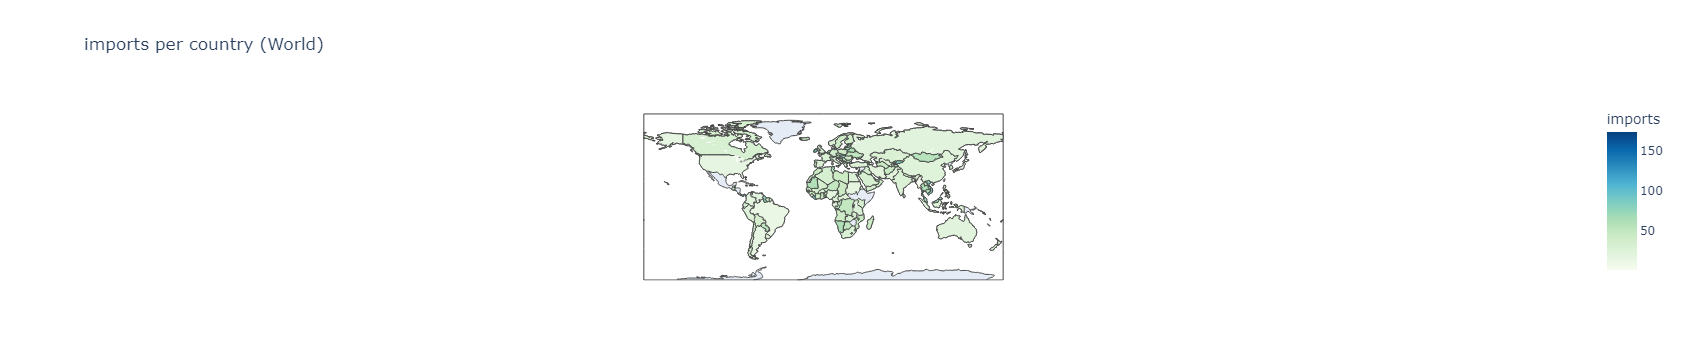

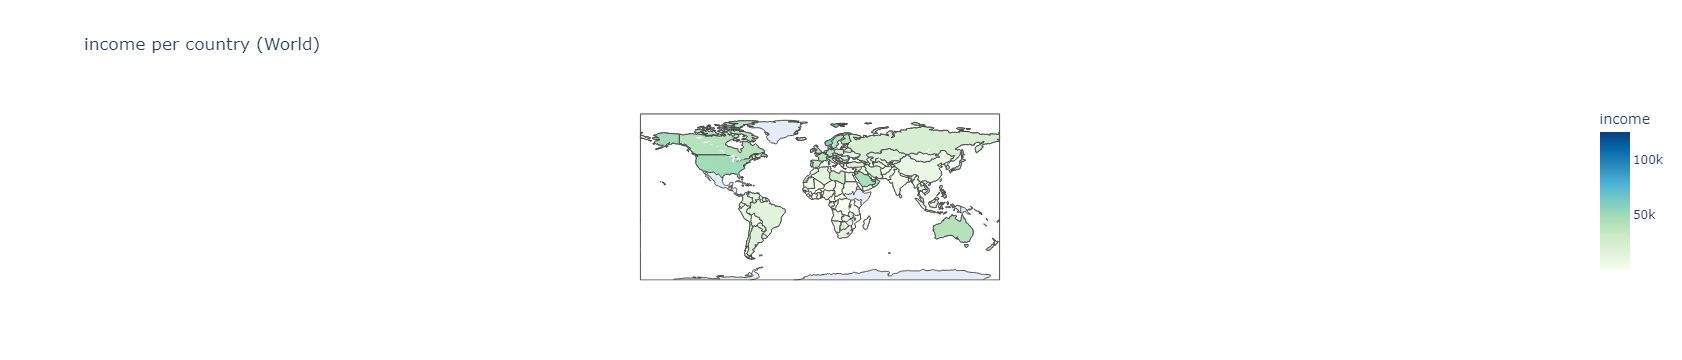

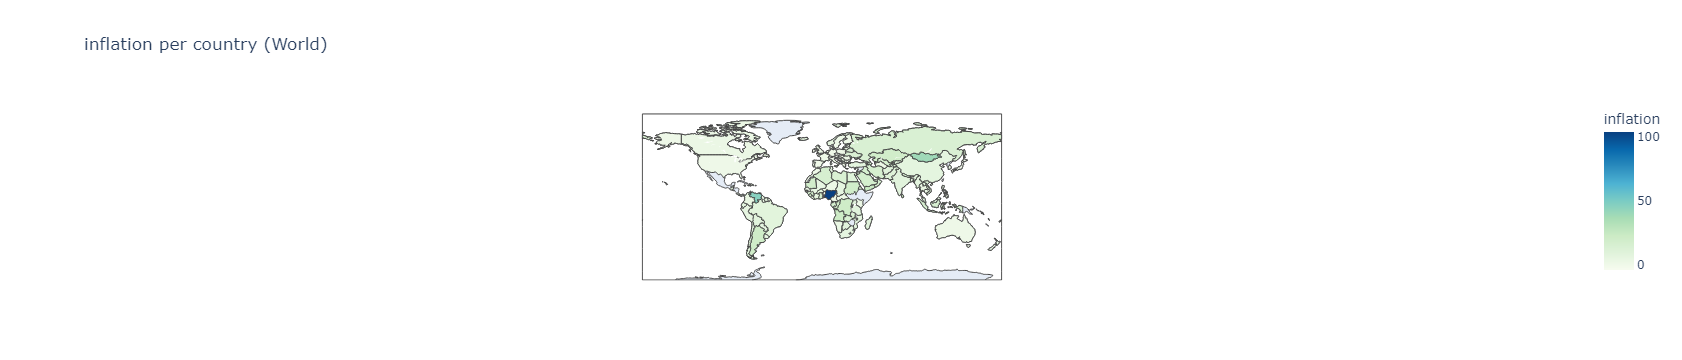

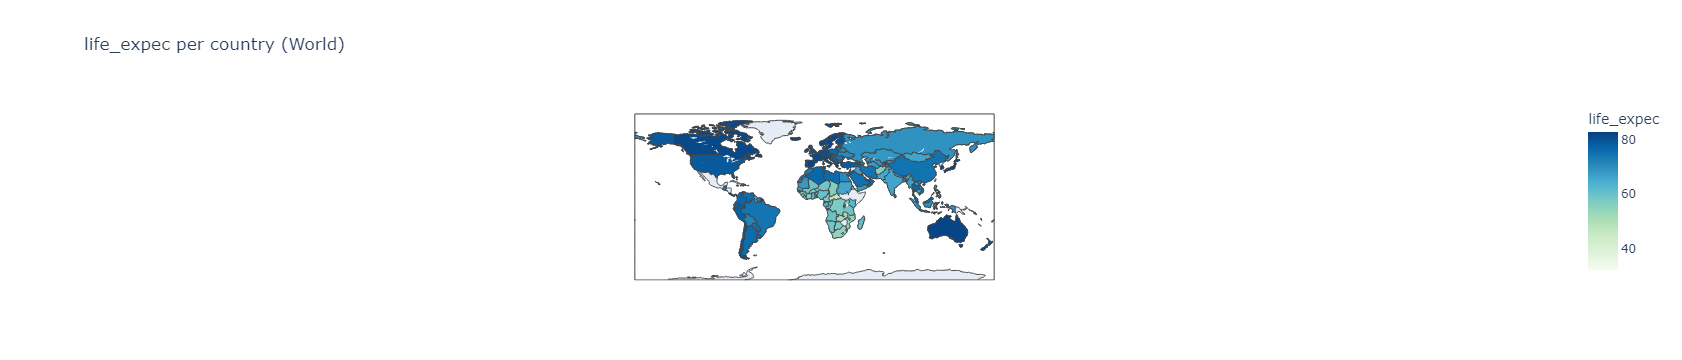

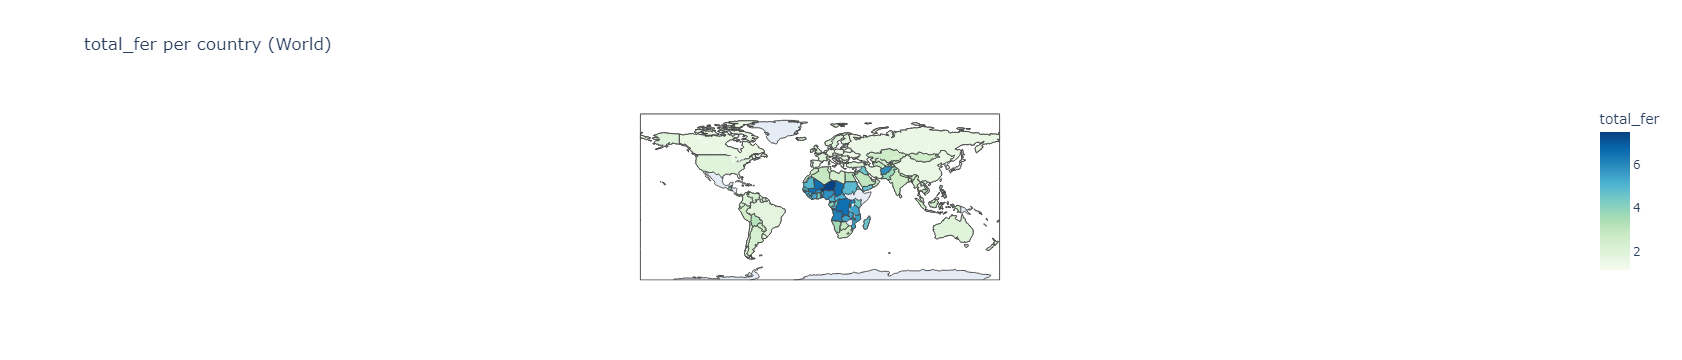

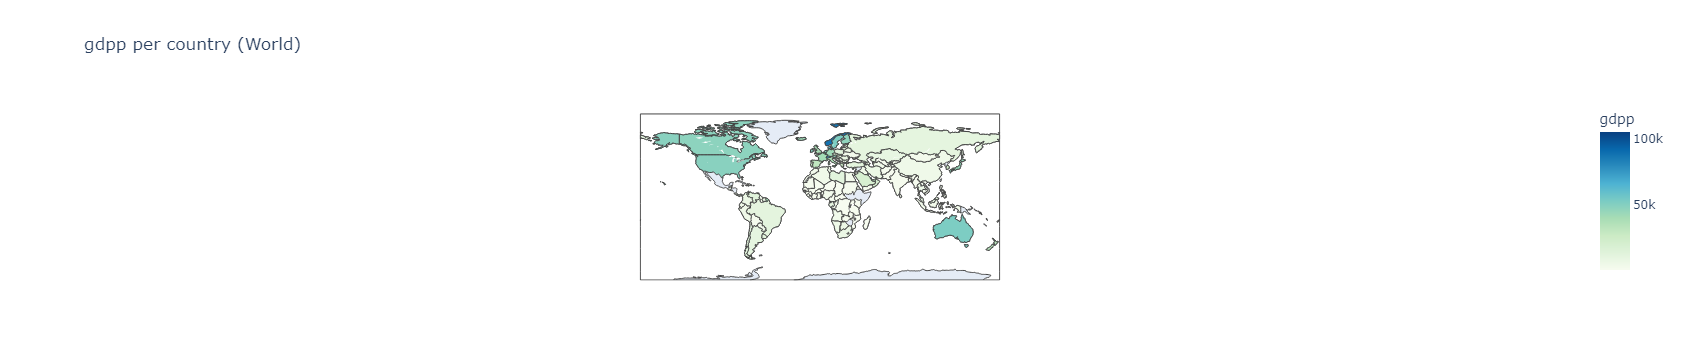

In [156]:
import plotly.express as px
for i in countriessocioeconomic.drop('country', axis=1).columns:
    fig = px.choropleth(countriessocioeconomic,
                        locationmode='country names',
                        locations='country',
                         title=i+' per country (World)',color=i,color_continuous_scale="GnBu"
                       )
    
    fig.update_geos(fitbounds="locations", visible=True)
    fig.show(engine='kaleido')

In [157]:
countriessocioeconomic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [158]:
countriessocioeconomic.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [159]:
countriessocioeconomic.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [160]:
countriessocioeconomic.shape

(167, 10)

IndexError: index 2 is out of bounds for axis 0 with size 2

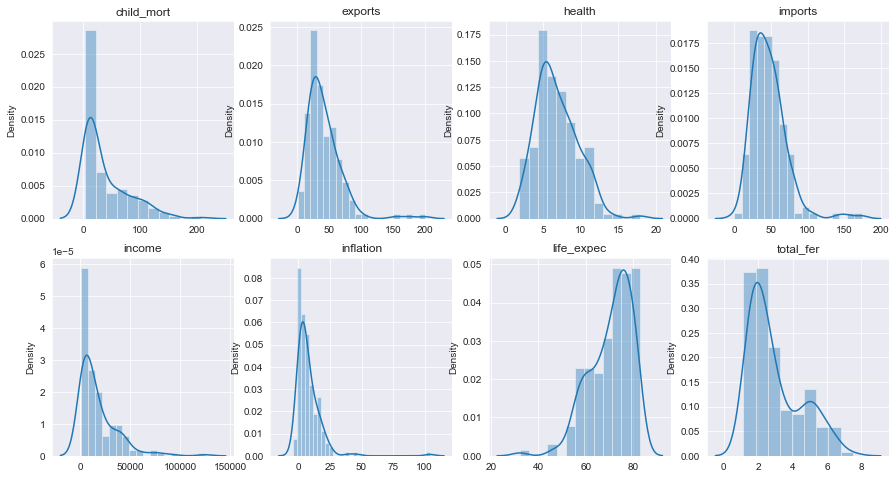

In [161]:
#Visualizamos más de una variable a la vez
variables = ['child_mort', 'exports', 'health', 'imports',
            'income', 'inflation', 'life_expec', 'total_fer',
            'gdpp']

columns = 4

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,8))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(countriessocioeconomic[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()

<Figure size 720x480 with 0 Axes>

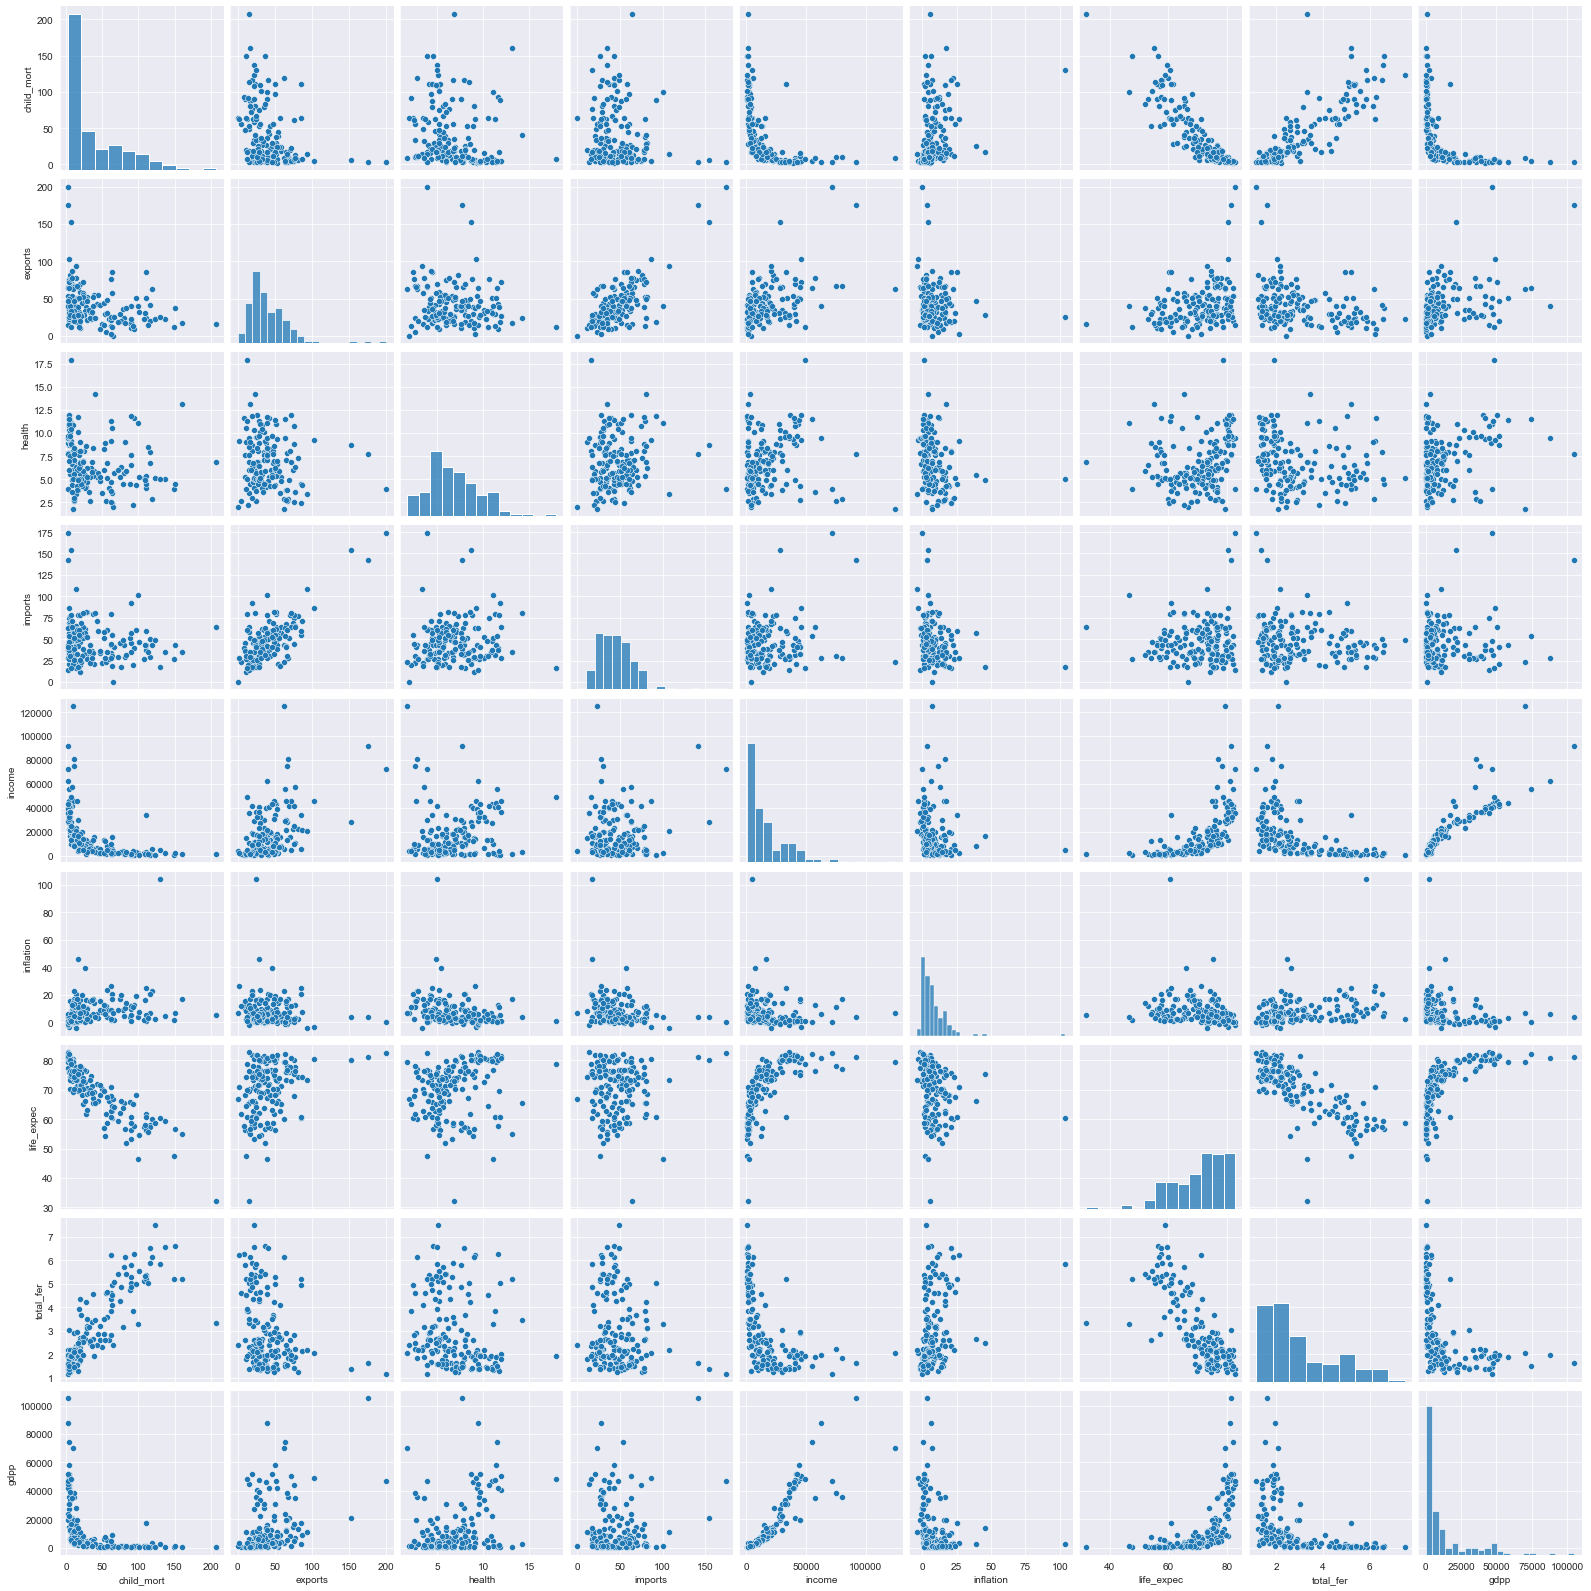

In [162]:
#Creamos un Pairplot 
plt.figure(dpi=120)
sns.pairplot(countriessocioeconomic)
plt.show()

In [169]:
#scaling data
scaling=StandardScaler()
scaled=scaling.fit_transform(countriessocioeconomic)

In [170]:
scaled_df=pd.DataFrame(scaled,columns=countriessocioeconomic.columns)

# princt scaled dataset
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


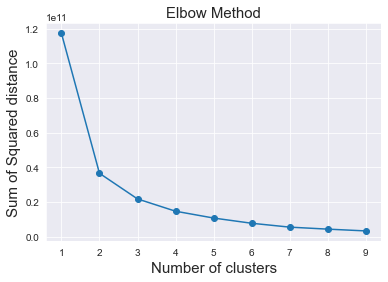

In [171]:
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(countriessocioeconomic)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [134]:
#chosing no. of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters = 3,random_state = 111)
kmeans.fit(scaled_df)

KMeans(n_clusters=3, random_state=111)

In [135]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

2    96
0    47
1    24
dtype: int64

In [136]:
#calculate how good our model is
#calculate Silhouette Coefficient for K=3
from sklearn import metrics
from sklearn.cluster import KMeans

metrics.silhouette_score(scaled_df, kmeans.labels_)

0.3793489042149255

In [137]:
#predicting values
cluster_labels = kmeans.fit_predict(scaled_df)

In [138]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(countriessocioeconomic)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters,k_labels,Need Help
country,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0,0,0
Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2,0,0
Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2,0,0
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0,0,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2,2,0
Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2,2,0
Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2,0,0
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1,1,1
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1,1,1


In [139]:
#save a kmeans file
kmeans_df.to_csv('kmeans_result.csv',index=False)

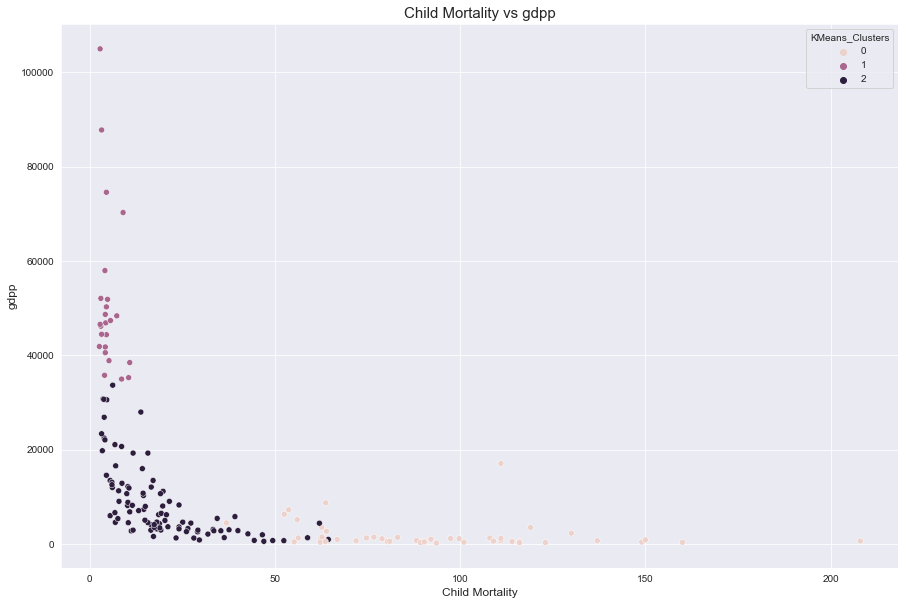

In [140]:
#Visualizaciones
sns.scatterplot(kmeans_df['child_mort'],kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

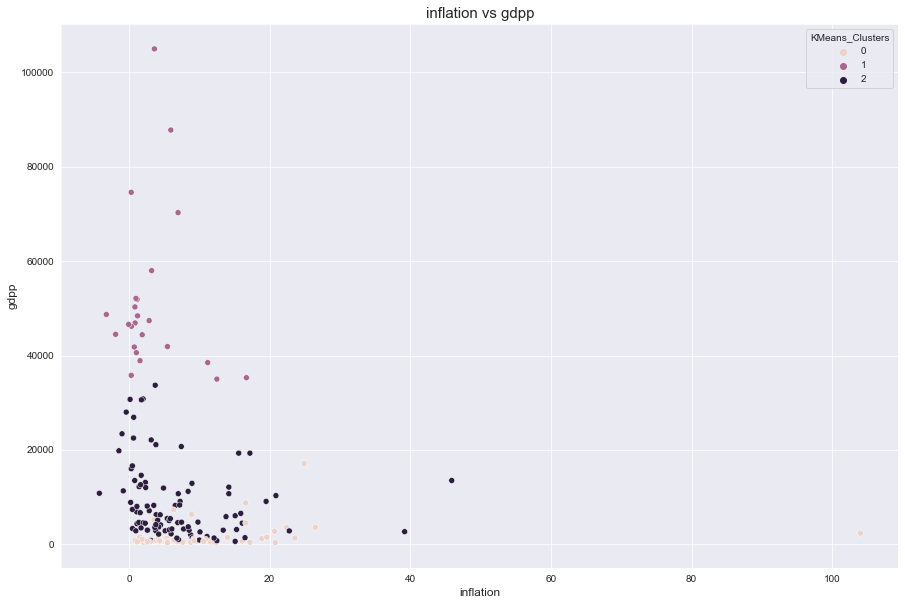

In [141]:
#visulization of clusters inflation vs gdpp
sns.scatterplot(kmeans_df['inflation'],kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("inflation vs gdpp", fontsize=15)
plt.xlabel("inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

In [178]:
countriessocioeconomic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [184]:

under_developing=kmeans_df[kmeans_df['KMeans_Clusters']==0]
developing=kmeans_df[kmeans_df['KMeans_Clusters']==1]
developed=kmeans_df[kmeans_df['KMeans_Clusters']==2]

print("Cantidad de países subdesarrollados",len(under_developing))
print("Cantidad de países en vías de desarrollo",len(developing))
print("Cantidad de países desarrollados",len(developed))

Cantidad de países subdesarrollados 47
Cantidad de países en vías de desarrollo 24
Cantidad de países desarrollados 96


In [187]:
under_developing

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters,k_labels,Need Help
country,,,,,,,,,,,,
Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0,0,0
Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0,0,0
Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0,0,0
Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,0,0,0
Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0,0,0
Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0,0,0
Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0,0,0
Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0,0,0
Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0,0,0


In [188]:
developing

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters,k_labels,Need Help
country,,,,,,,,,,,,
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1,1,1
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1,1,1
Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1,1,1
Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1,1,1
Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1,1,1
Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1,1,1
Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1,1,1
France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1,1,1
Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,1,1,1


In [189]:
developed

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters,k_labels,Need Help
country,,,,,,,,,,,,
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,2,0
Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,2,2,0
Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,2,2,0
Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,2,0,0
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,0,0


In [190]:
countriessocioeconomic.set_index("country",inplace = True)

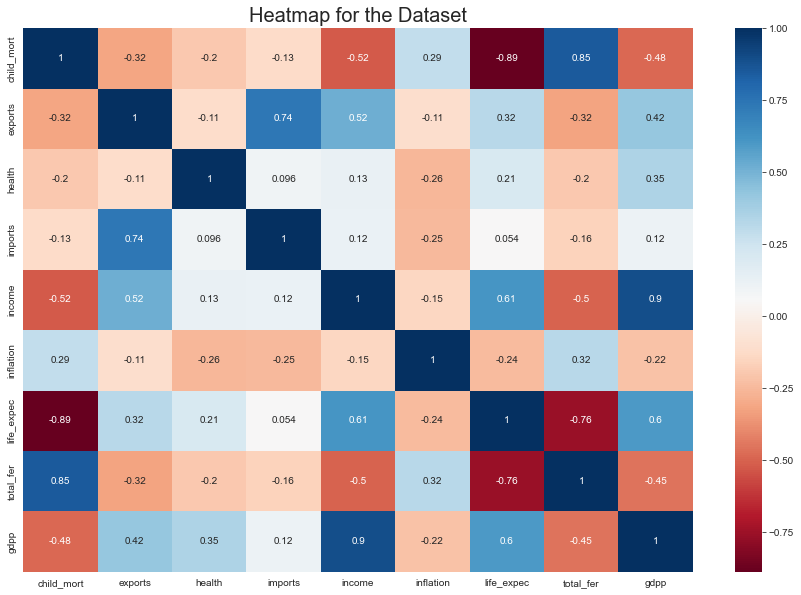

In [191]:
plt.rcParams['figure.figsize'] = (15, 10)

sns.heatmap(countriessocioeconomic.corr(), annot = True, cmap = 'RdBu')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

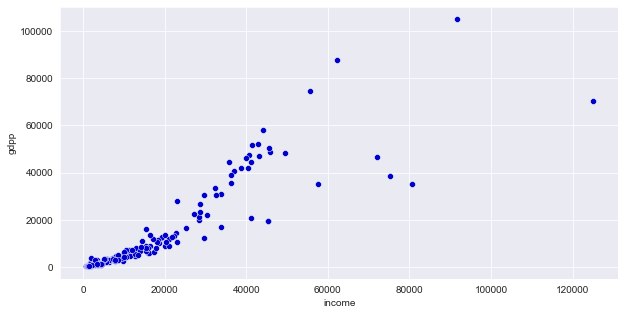

In [87]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='income',y='gdpp',data=countriessocioeconomic, color='mediumblue')
plt.show()

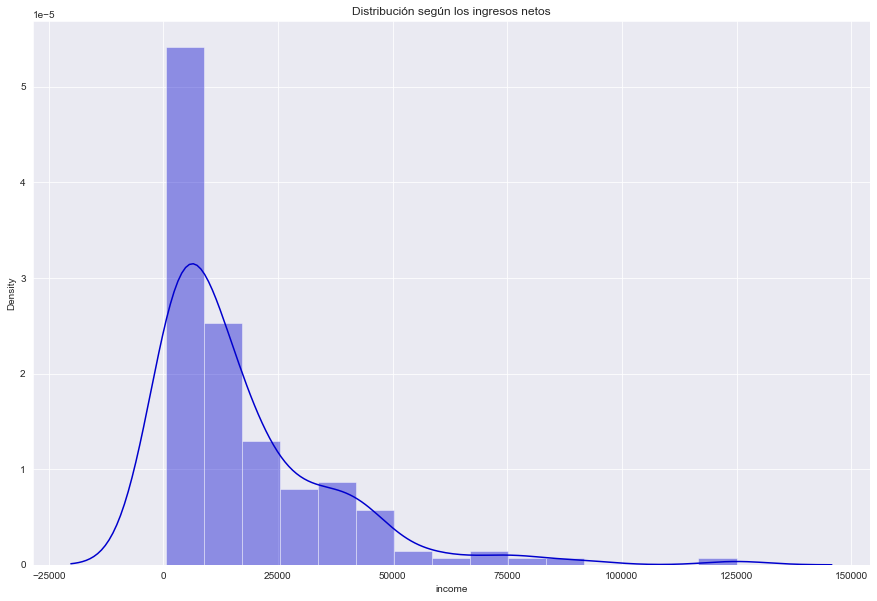

In [88]:
##Análisis Univariado 
sns.distplot(countriessocioeconomic.income, kde=True, hist=True, bins=15, color='mediumblue')
plt.xlabel('income')
plt.ylabel('Density')
plt.title('Distribución según los ingresos netos')

plt.show()

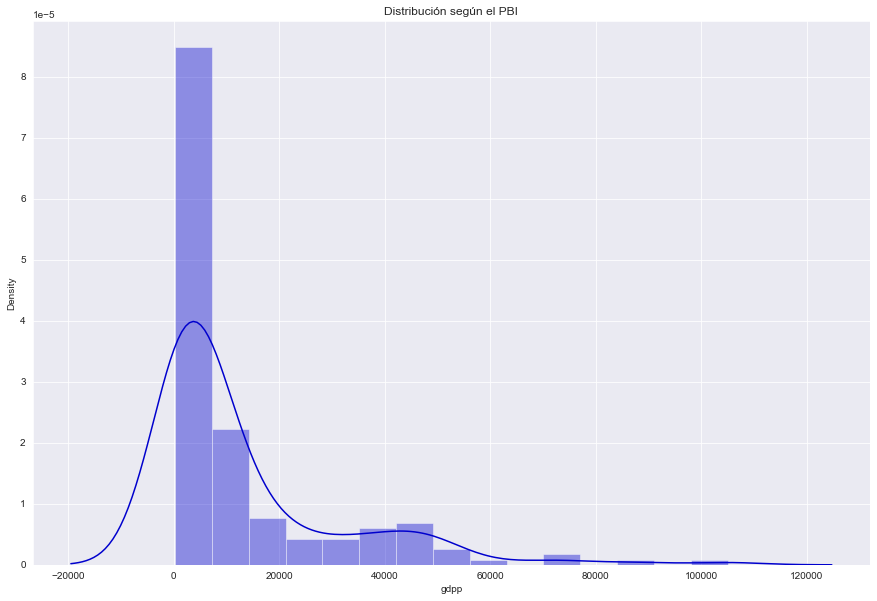

In [89]:
##Análisis Univariado 
sns.distplot(countriessocioeconomic.gdpp, kde=True, hist=True, bins=15, color='mediumblue')
plt.xlabel('gdpp')
plt.ylabel('Density')
plt.title('Distribución según el PBI')

plt.show()

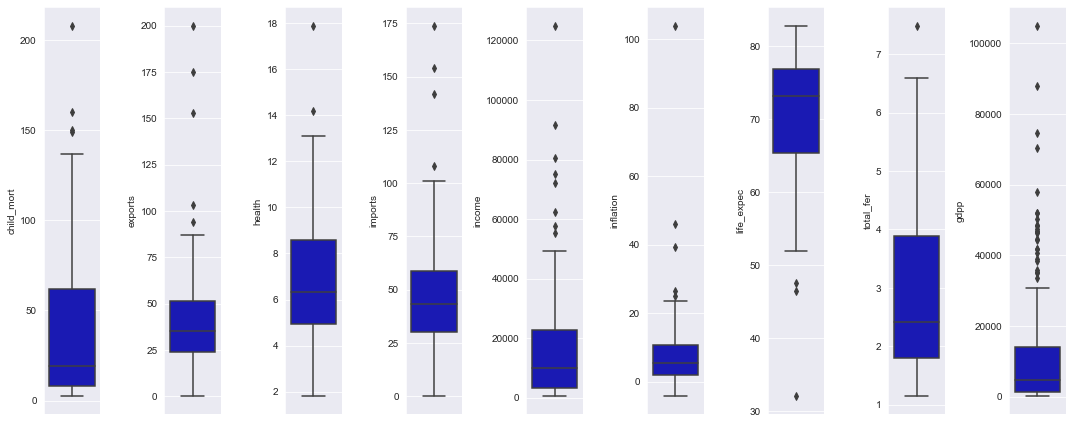

In [90]:
##Con el boxplot podemos observar que variables tienen valores extrempos
variables = ['child_mort', 'exports', 'health', 'imports',
            'income', 'inflation', 'life_expec', 'total_fer',
            'gdpp']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=countriessocioeconomic, ax=ax, color='mediumblue')
plt.tight_layout()

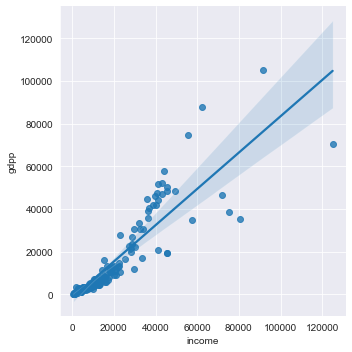

In [91]:
sns.lmplot(x='income', y='gdpp', data=countriessocioeconomic, fit_reg=True, palette="mediumblue")

In [92]:
import plotly.express as px

In [103]:
#Preparacion de datos
countriessocioeconomic = countriessocioeconomic.replace('?', np.nan)
countriessocioeconomic = countriessocioeconomic.dropna()
countriessocioeconomic.shape

(167, 9)

In [104]:
#Preparacion de datos
X = countriessocioeconomic.iloc[:, :-1].values
y = countriessocioeconomic.iloc[:, 1].values

In [105]:
#Empezamos a crear nuestro modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [106]:
#Entrenando el modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'PBI per cápita')

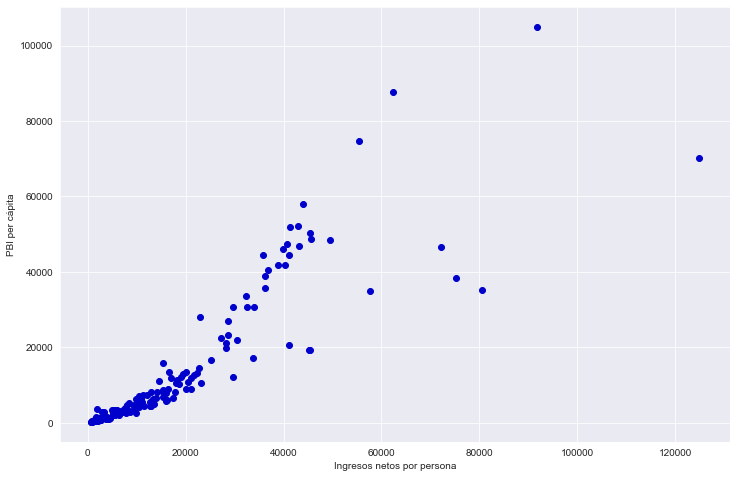

In [107]:
#En un plot analizamos la relación entre los ingresos netos y el PBI
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(countriessocioeconomic['income'], countriessocioeconomic['gdpp'], color='mediumblue')

plt.xlabel('Ingresos netos por persona')
plt.ylabel('PBI per cápita')

In [108]:
##Regresion Lineal
from sklearn.model_selection import train_test_split

X = countriessocioeconomic[['income']] ##Ingresos netos por persona
Y = countriessocioeconomic['gdpp'] ##PBI per cápita

#Train y Test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [81]:
#Importamos, creamos y fiteamos el modelo
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [82]:
print('Puntaje Entrenamiento: ', linear_model.score(x_train, y_train))

Puntaje Entrenamiento:  0.7994119812784466


In [83]:
#Realizamos las predicciones
y_pred = linear_model.predict(x_test)

In [84]:
from sklearn.metrics import r2_score

print('Puntaje Testing: ', r2_score(y_test, y_pred))

Puntaje Testing:  0.7978514583885267


In [85]:
#Regresion lineal con varias caracteristicas
X = countriessocioeconomic[['child_mort', 'life_expec', 'gdpp']]
Y = countriessocioeconomic['income'] ##Ingresos netos por persona

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [86]:
#Creamos el modelo
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [87]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.8338070049300772


In [88]:
#Coeficientes
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

child_mort    -44.254352
gdpp            0.774491
life_expec    106.415704
dtype: float64


In [89]:
#Realizamos las predicciones
y_pred = linear_model.predict(x_test)

In [90]:
print('Puntaje Testing', r2_score(y_test, y_pred))

Puntaje Testing 0.7486798504966514


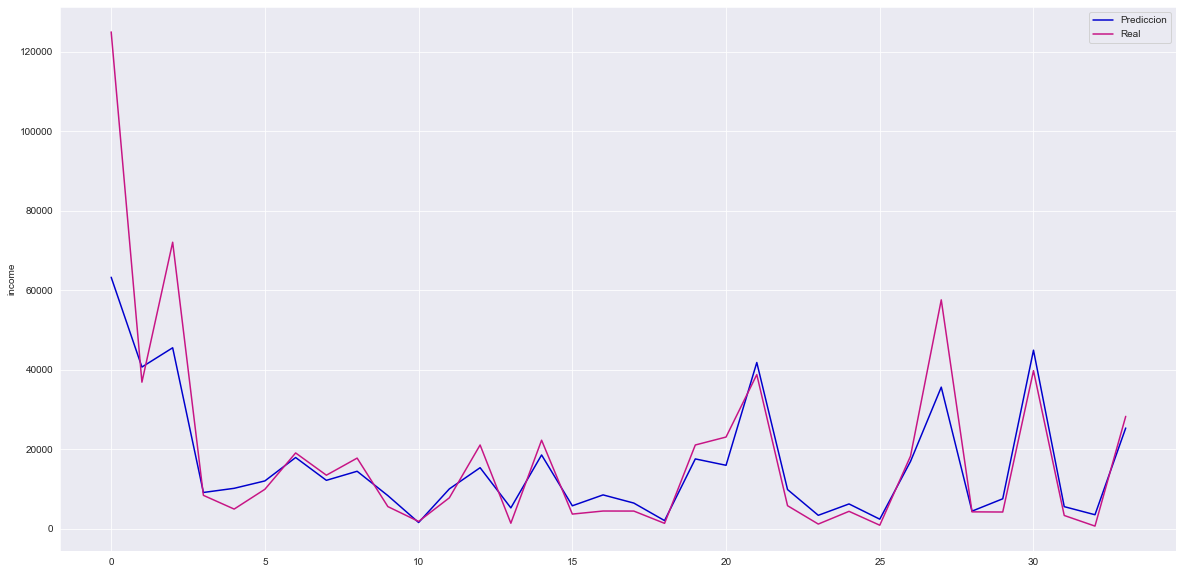

In [91]:
#Ploteamos en base al income (ingresos netos)
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Prediccion', color='mediumblue')
plt.plot(y_test.values, label='Real', color='mediumvioletred')

plt.ylabel('income')

plt.legend()
plt.show()

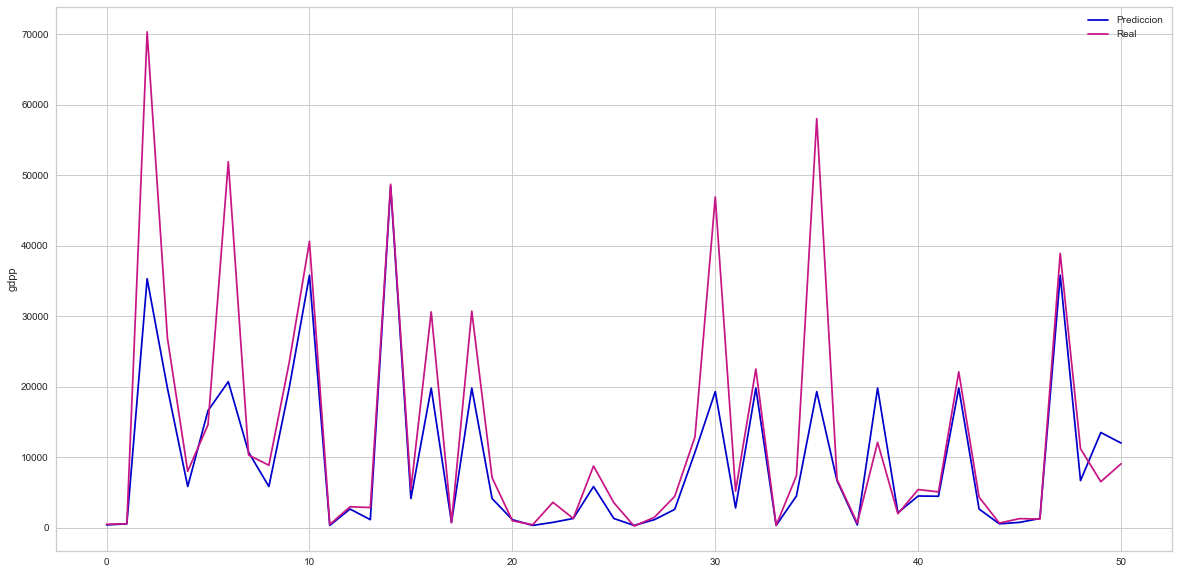

In [114]:
#Ploteamos en base al PBI (gdp)
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Prediccion', color='mediumblue')
plt.plot(y_test.values, label='Real', color='mediumvioletred')

plt.ylabel('gdpp')

plt.legend()
plt.show()

In [92]:
#Evaluación de Modelos.Estas funciones siempre esperan el y_test y el y_pred (lo real y lo predicho)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5779.223847763502
Mean Squared Error: 156314206.53210562
Root Mean Squared Error: 12502.567997499778


In [93]:
pip install --upgrade --no-deps statsmodels


Note: you may need to restart the kernel to use updated packages.


In [94]:
import statsmodels.api as sm


In [95]:
#Creacion del modelo con statsmodels.api.

X = countriessocioeconomic["income"] # X: variables independientes
X = sm.add_constant(X)# Se agrega una intercepción (beta_0) al modelo
y = countriessocioeconomic["gdpp"] # Y: variable respuesta (o variable dependiente)

# Fiteamos el modelo
Modelo = sm.OLS(y, X).fit()   
predictions = Modelo.predict(X)

In [96]:
#Estadisticas del modelo
Modelo.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gdpp   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     668.5
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           6.40e-60
Time:                        18:16:48   Log-Likelihood:                -1740.5
No. Observations:                 167   AIC:                             3485.
Df Residuals:                     165   BIC:                             3491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1634.0040    848.165     -1.927      0.056   -3308.659      40.651
income         0.8515      0.033     25.856      0.000       0.786       0.916
==============================================================================
Omnibus:                       35.201   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.452
Skew:                           0.350   Prob(JB):                     4.23e-65
Kurtosis:                       9.490   Cond. No.                     3.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
#Ajuste del modelo - statsmodels.formula.api
import statsmodels.formula.api as smf
Modelo2 = smf.ols('income ~ gdpp', data=countriessocioeconomic).fit()

In [98]:
#Vemos las estadisticas del modelo
print(Modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     668.5
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           6.40e-60
Time:                        18:16:53   Log-Likelihood:                -1749.0
No. Observations:                 167   AIC:                             3502.
Df Residuals:                     165   BIC:                             3508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4932.9867    816.246      6.044      0.0

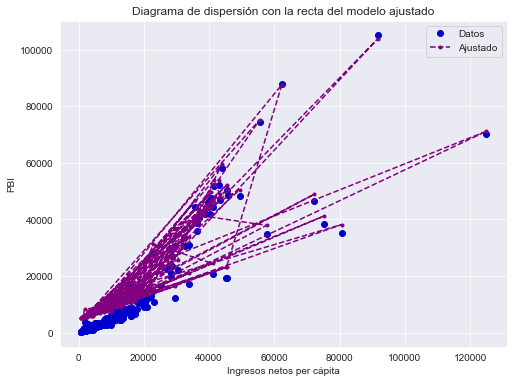

In [99]:
#Recta de regresion estimada según ingresos netos y PBI (gdp)
fig, ax = plt.subplots(figsize=(8,6))                                    # Ajuste del gráfico
ax.plot(countriessocioeconomic["income"] , countriessocioeconomic["gdpp"] , 'o', label="Datos", color='mediumblue')                         # Ajuste para las etiquetas del gráfico
ax.plot(countriessocioeconomic["income"], Modelo2.fittedvalues, 'r--.', label="Ajustado", color='purple')           # Ajuste para las etiquetas del gráfico
legend = ax.legend(loc="best")                                           # Ajustes para las leyendas del gráfico
plt.xlabel('Ingresos netos per cápita')                                          # Etiqueta del eje X
plt.ylabel('PBI')                                               # Etiqueta del eje Y
plt.title('Diagrama de dispersión con la recta del modelo ajustado');    # Título del gráfico

In [ ]:
#A continuación se Calcula el Silhouette Score

In [100]:
#Cargamos las librerias
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [101]:
#Creacion de K-Means
km = KMeans(n_clusters=3, random_state=42)
km.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [102]:
#Calculo de Silhouette con medidor de distancia manhattan
score = silhouette_score(X, km.labels_, metric='manhattan')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.683


In [103]:
#Calculo de Silhouette con medidor de distancia chebyshev
score = silhouette_score(X, km.labels_, metric='chebyshev')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.683


Found existing installation: scikit-learn 1.1.1
Uninstalling scikit-learn-1.1.1:
  Successfully uninstalled scikit-learn-1.1.1


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\juanj\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 173, in _main
    status = self.run(options, args)
  File "C:\Users\juanj\anaconda3\lib\site-packages\pip\_internal\commands\uninstall.py", line 97, in run
    uninstall_pathset.commit()
  File "C:\Users\juanj\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 436, in commit
    self._moved_paths.commit()
  File "C:\Users\juanj\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 287, in commit
    save_dir.cleanup()
  File "C:\Users\juanj\anaconda3\lib\site-packages\pip\_internal\utils\temp_dir.py", line 184, in cleanup
    rmtree(self._path)
  File "C:\Users\juanj\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 326, in wrapped_f
    return self(f, *args, **kw)
  File "C:\Users\juanj\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 406, in __call__
    do = self.iter(r

  Using cached scikit_learn-1.1.1-cp39-cp39-win_amd64.whl (7.4 MB)


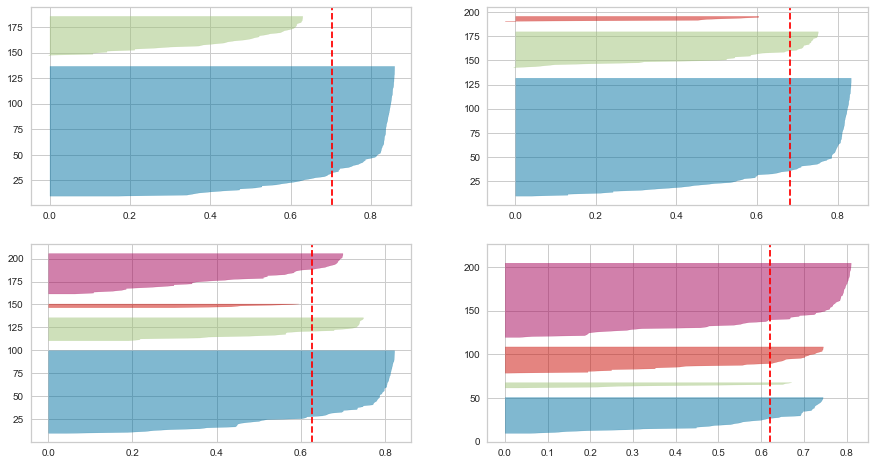

In [104]:
!pip uninstall scikit-learn -y
!pip3 install scikit-learn
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8)) #Definimos el tamaño del gráfico
for i in [2, 3, 4, 5]:
    
    #Creando diferentes instancias de kmeans para distinta cantidad de cluster
    countriessocioeconomic = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    #Visualizamos el índice Silhouette con yellowbrick
    visualizer = SilhouetteVisualizer(countriessocioeconomic,colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [ ]:
#LOOCV para Clasificación

In [105]:
#Importamos las librerias
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [106]:
#Creamos el modelo 
cv = LeaveOneOut()

In [107]:
#Random Forest
model = RandomForestClassifier(random_state=1)

In [108]:
# Evaluacion del Modelo. njobs -1 es que va a usar todos los procesadores de la pc. Se usa el accuracy porque el dataset esta balanceado.
#cv es el nombre del modelo
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [109]:
#
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.024 (0.153)


In [ ]:
#LightGBM

In [110]:
#Separamos en Train y Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [111]:
!pip install lightgbm
import lightgbm as lgb #pip install lightgbm
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [113]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.0196
